# MVP : NY Health Inspection/Demographic/Reviews Data Project
- still need reviews/census data

# ACQUISITION

## Imports used

In [1]:
%load_ext autoreload
%autoreload 2

# Imported libraries
import acquire as a
import prepare as p
import explore as e
import os
import pandas as pd

# Aquisition function that pulls data currently stored or requests the data from socrata

In [2]:
ny = a.acquire_ny()

In [3]:
ny.head()

,camis,dba,boro,building,street,zipcode,phone,inspection_date,critical_flag,record_date,...,bbl,nta,cuisine_description,action,violation_code,violation_description,score,grade,grade_date,inspection_type
0,50106756,UNGARO COAL FIRED PIZZA CAFE,Staten Island,1298,FOREST AVENUE,10302.0,6464690930,1900-01-01T00:00:00.000,Not Applicable,2023-10-26T06:00:14.000,...,5.003870e+09,SI07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50105716,STELLA'S,Brooklyn,559,5 AVENUE,11215.0,4155703174,1900-01-01T00:00:00.000,Not Applicable,2023-10-26T06:00:14.000,...,3.010480e+09,BK37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41168748,DUNKIN,Bronx,880,GARRISON AVENUE,10474.0,7188614171,2022-03-30T00:00:00.000,Not Critical,2023-10-26T06:00:11.000,...,2.027390e+09,BX27,Donuts,Violations were cited in the following area(s).,10J,Hand wash sign not posted,13.0,A,2022-03-30T00:00:00.000,Cycle Inspection / Initial Inspection
3,50131566,EXTACY LOUNGE,Queens,7701,JAMAICA AVE,11421.0,3478752367,1900-01-01T00:00:00.000,Not Applicable,2023-10-26T06:00:14.000,...,4.088410e+09,QN53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50128764,RUNNING KIDS,Brooklyn,856,64 STREET,11220.0,7188338856,1900-01-01T00:00:00.000,Not Applicable,2023-10-26T06:00:14.000,...,3.057420e+09,BK34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207929 entries, 0 to 207928
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   camis                  207929 non-null  int64  
 1   dba                    207421 non-null  object 
 2   boro                   207929 non-null  object 
 3   building               207578 non-null  object 
 4   street                 207923 non-null  object 
 5   zipcode                205249 non-null  float64
 6   phone                  207922 non-null  object 
 7   inspection_date        207929 non-null  object 
 8   critical_flag          207929 non-null  object 
 9   record_date            207929 non-null  object 
 10  latitude               207672 non-null  float64
 11  longitude              207672 non-null  float64
 12  community_board        204682 non-null  float64
 13  council_district       204678 non-null  float64
 14  census_tract           204678 non-nu

## Removed features that were not useful:
- critical_flag
- grade_date
- record_date
- inspection_type
- community_board
- council_district
- census_tract
- bin
- nta

# PREPARATION

## Prepare function ran: retained zipode to match the demographic features (using as primary key for this join)

In [5]:
# Prep function
ny = p.final_ny()

In [6]:
# info
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60825 entries, 0 to 60824
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  60825 non-null  int64  
 1   dba                    60825 non-null  object 
 2   boro                   60825 non-null  object 
 3   phone                  60825 non-null  int64  
 4   inspection_date        60825 non-null  object 
 5   latitude               60825 non-null  float64
 6   longitude              60825 non-null  float64
 7   cuisine_description    60825 non-null  object 
 8   action                 60825 non-null  object 
 9   score                  60825 non-null  int64  
 10  grade                  60825 non-null  object 
 11  full_address           60825 non-null  object 
 12  violation_code         60825 non-null  object 
 13  violation_description  60825 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 6.5+ 

## Cleaning actions:
- aggregated and combined informations
- Dropped many null values
- encoded matching scores with grades
- violations code and text descriptions corrected and matched appropriately

# ***Health Inspection Data*** EXPLORATORY DATA ANALYSIS

## Distribution of retrieved NY health inspection data

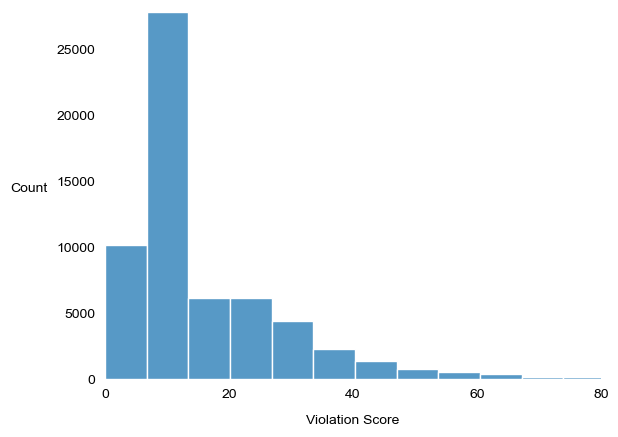

In [7]:
e.data_distribution(ny)

# Q-1. **What are the top 20 businesses in the NY Health Inspections dataset?**

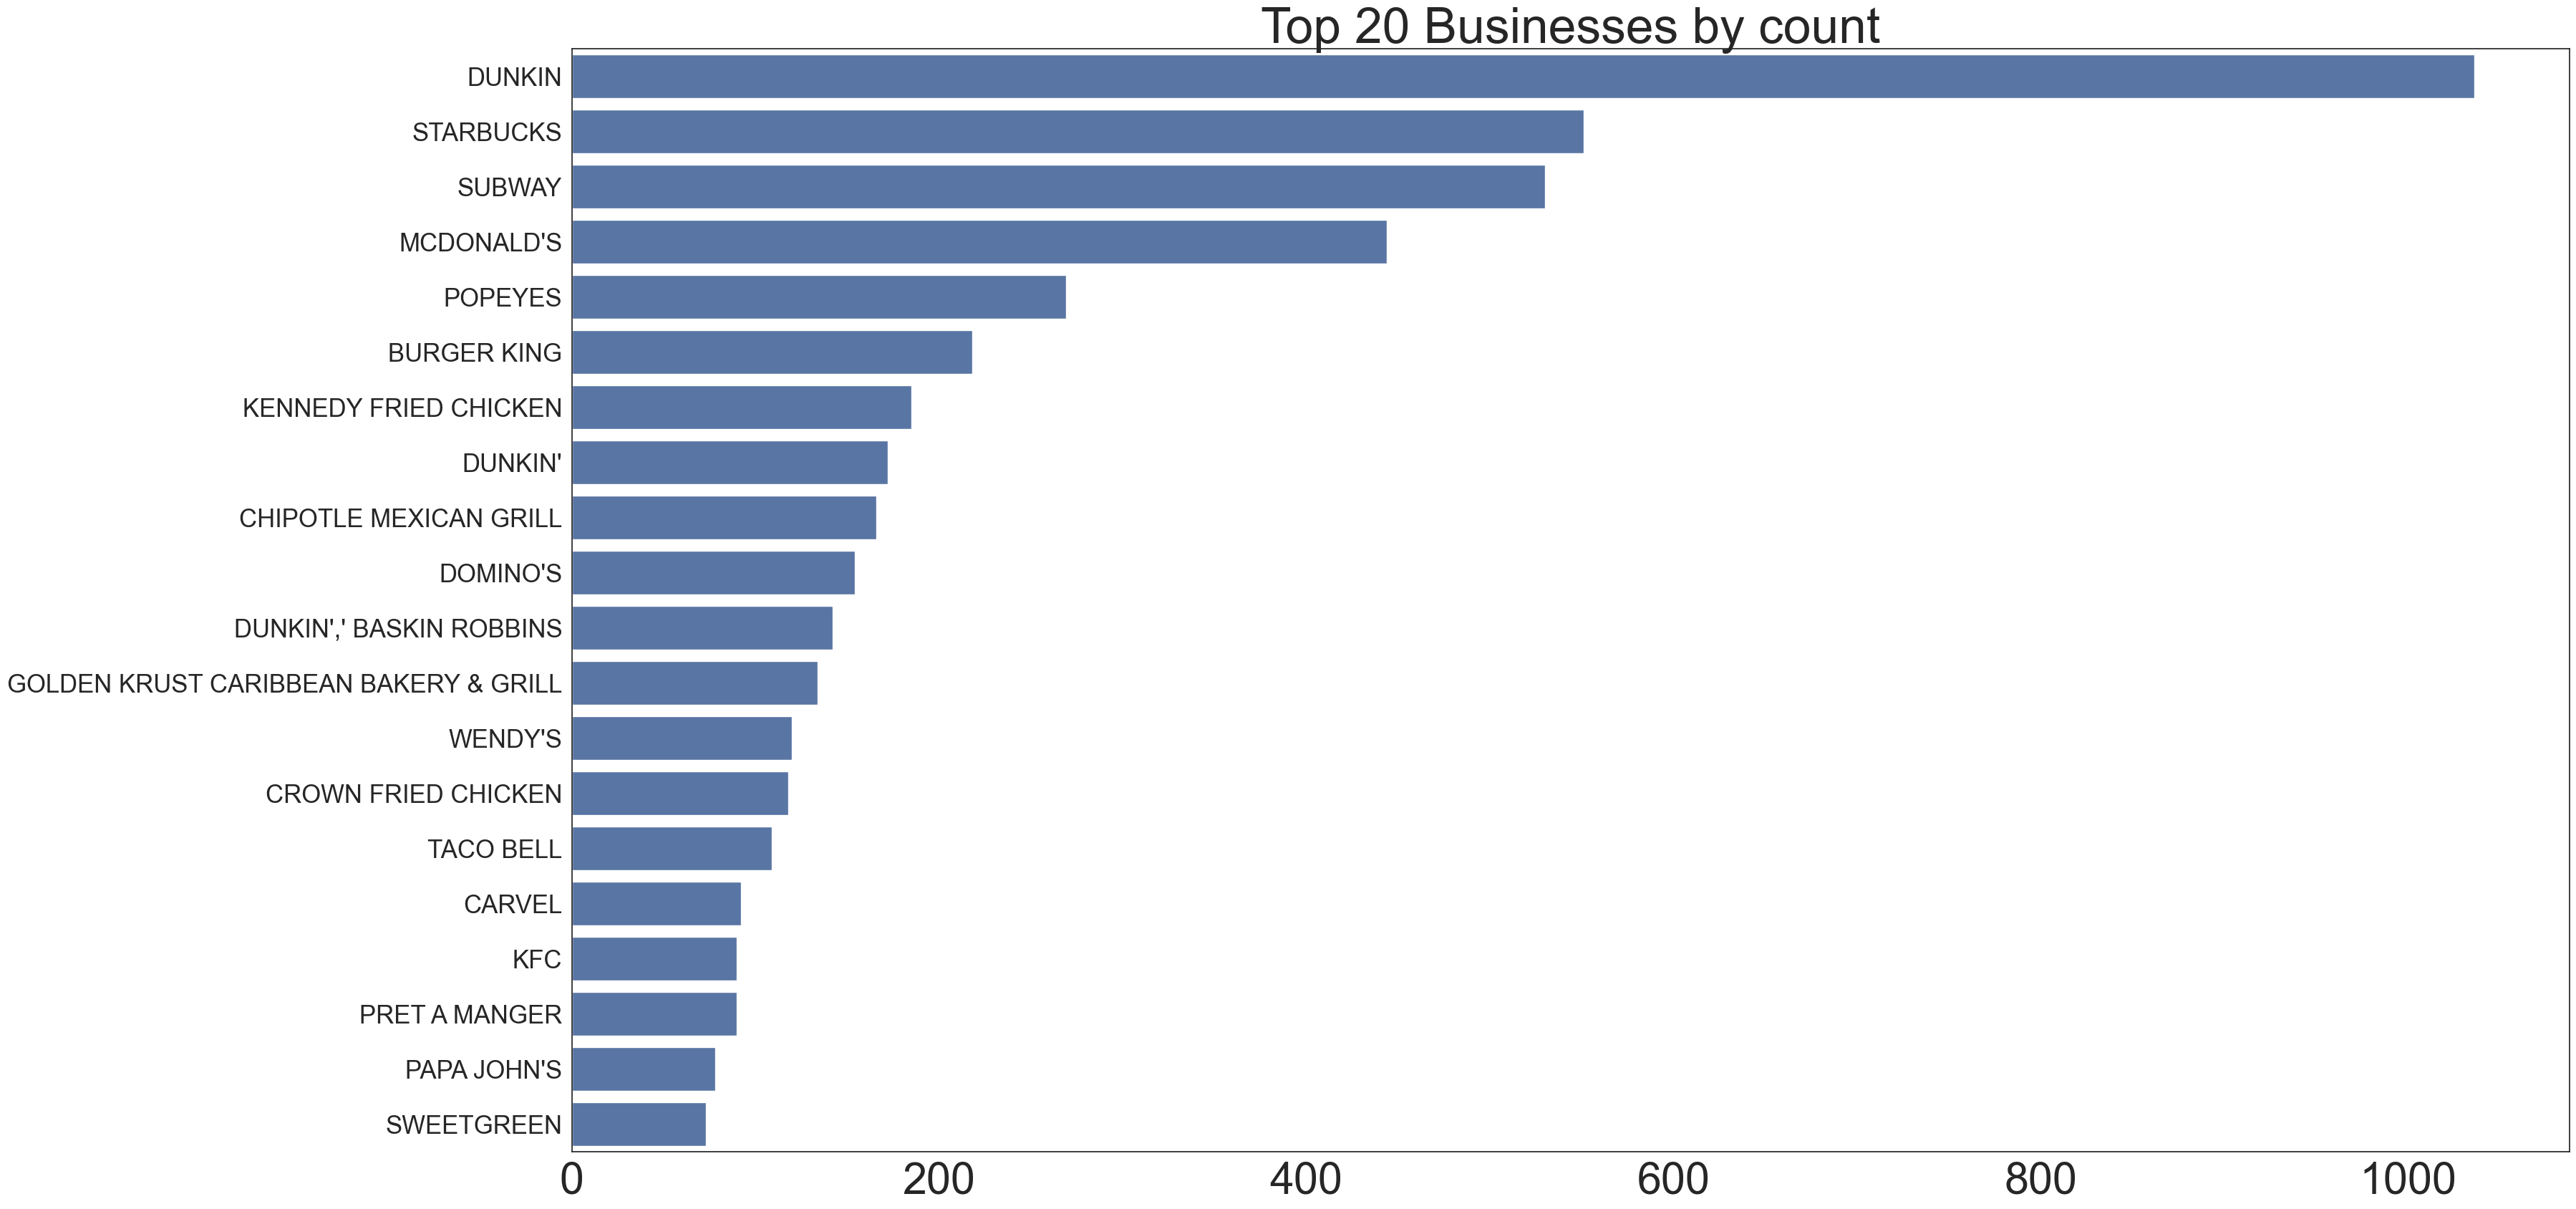

In [8]:
e.visual_1(ny)

  ## Takeaway: 
    
- **Organized by unique camis_id (unique business ids); Dunkin, Dunkin', and Dunkin'/other businesses attached or combined seems to come up the most in our top 20 listing.**

# Q-2. What were the top 20 cuisine descriptions listed on inspections?

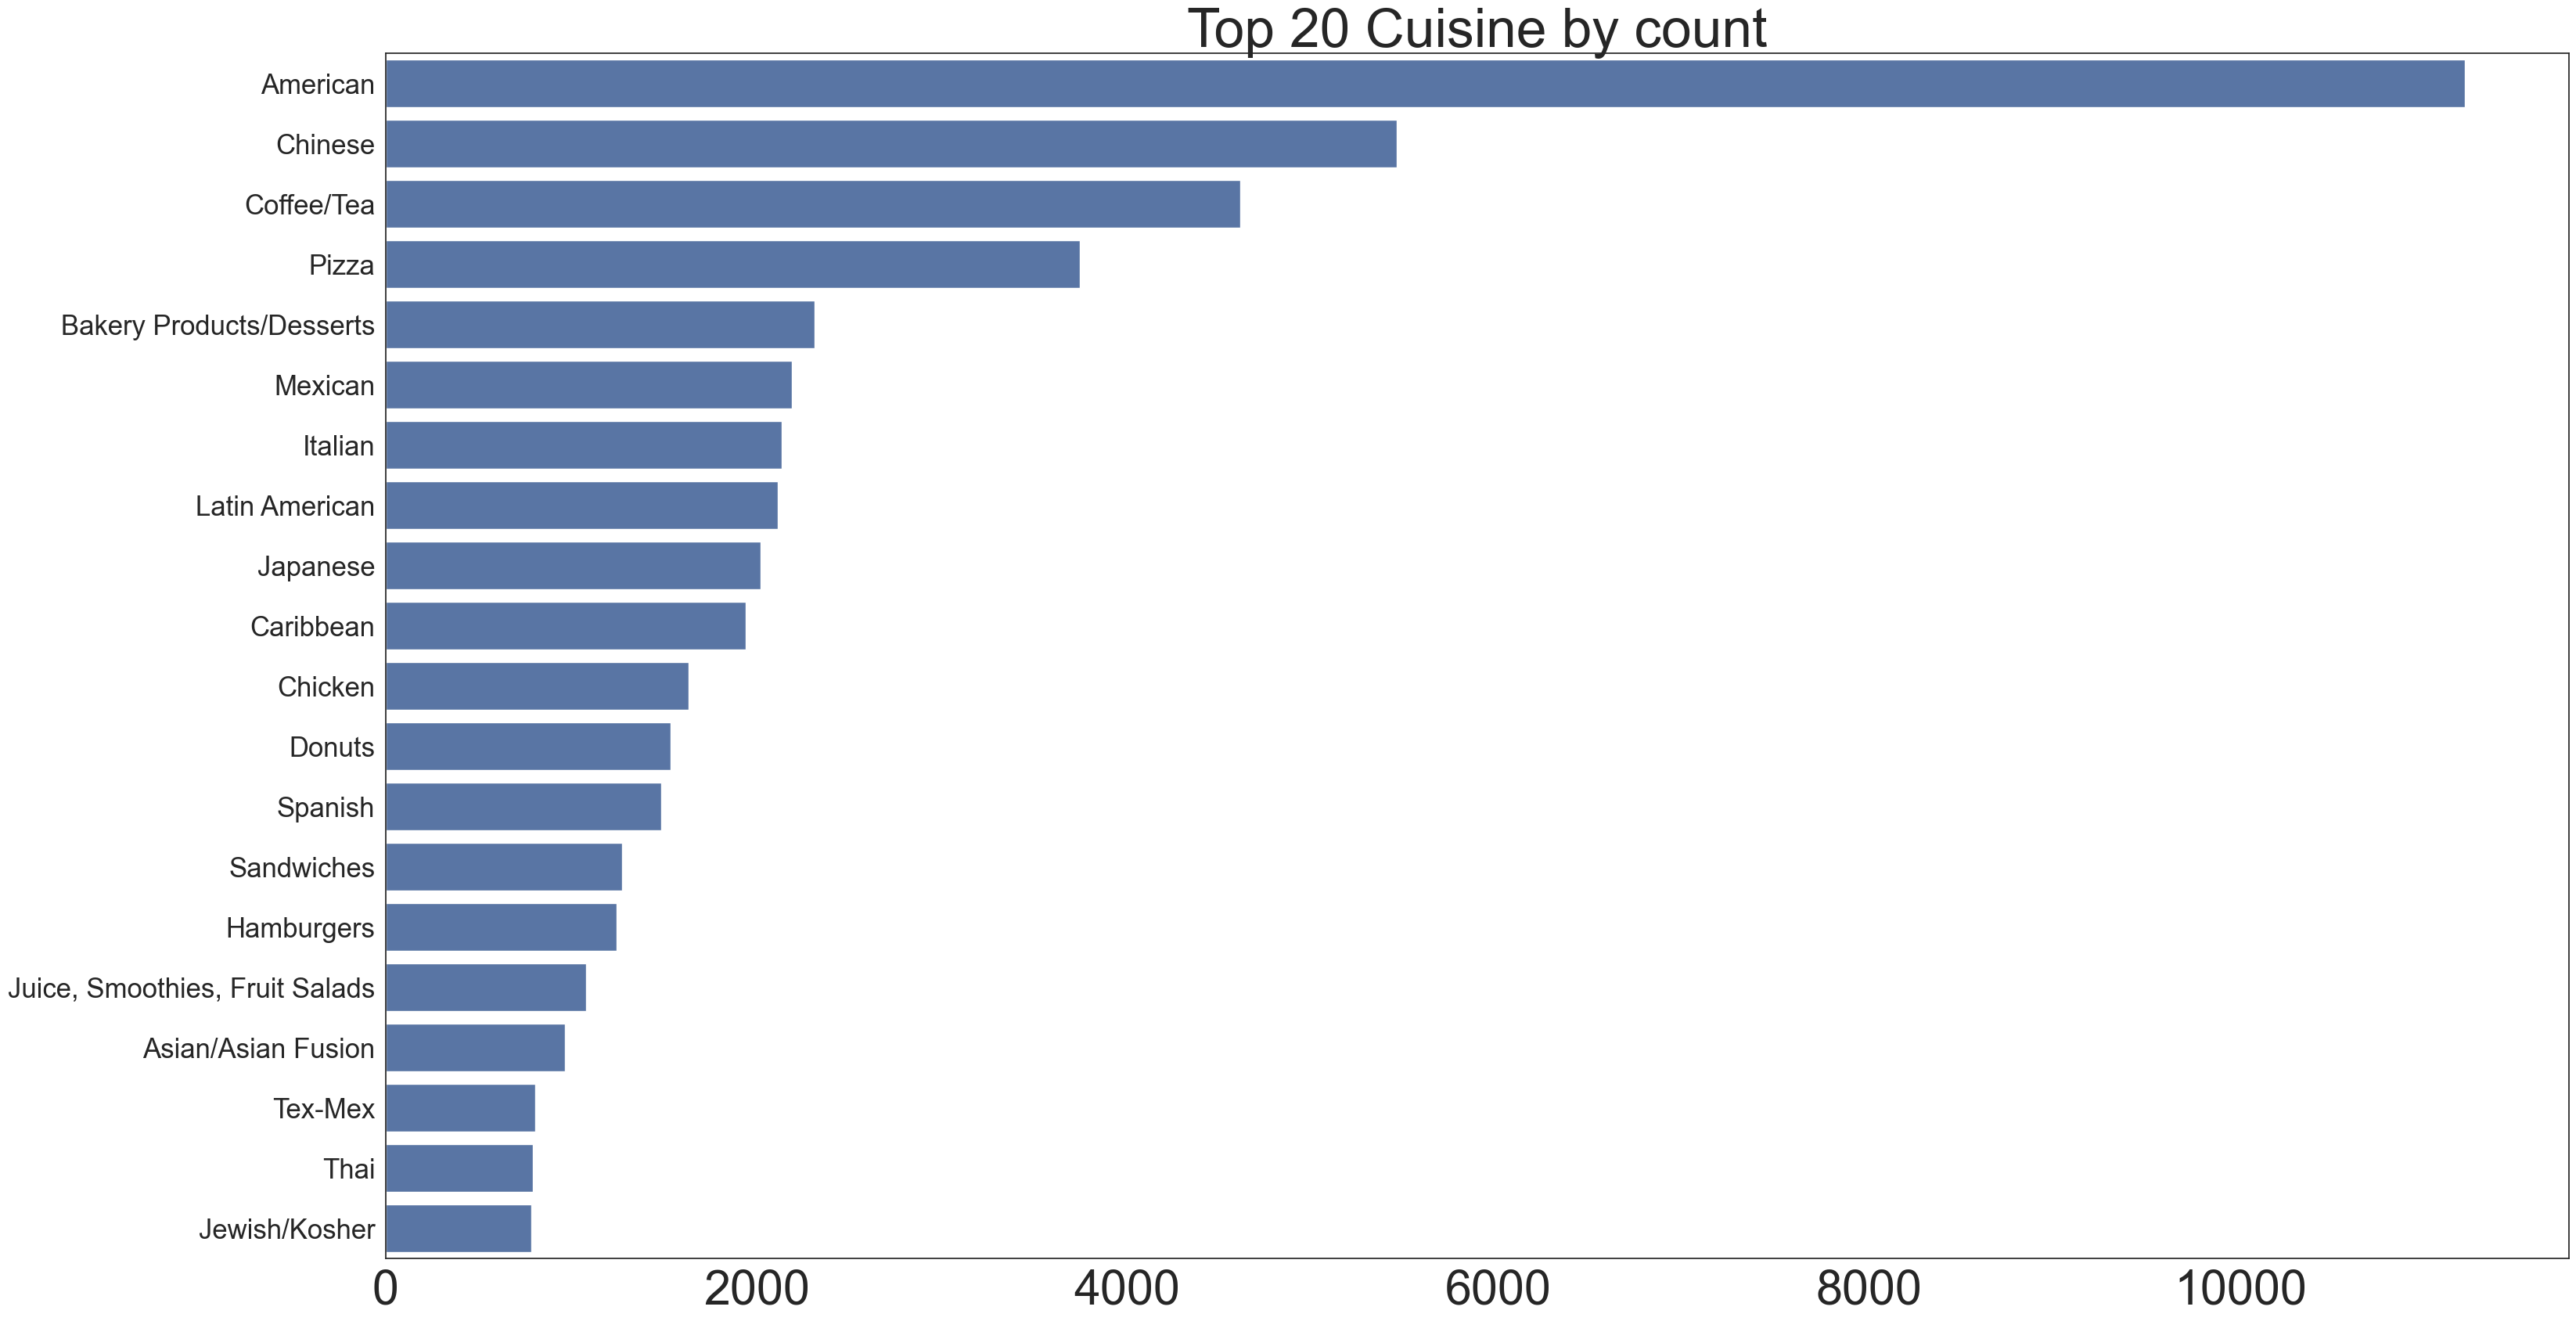

In [9]:
e.visual_2(ny)

  ## Takeaway: 
    
- **The top cuisine descriptions were annotated as American cuisine. However, it is worth noting that items such as sandwiches, hamburgers, or any single food items do not have a clear ethnic association, making this feature weak in terms of predicting grade or score outcomes.**

## Marc:

## ***After looking at the top failing scores across all boroughs and result actions taken by the health inspection we noted the biggest difference between 2 boroughs scores/outcomes decided to conduct and independent t-test to determine is there is a significant difference between the Bronx and Queens.***

# Q-3. Based on the Top 20 failing business for the Bronx and Queens, is there a significant difference between the Bronx and Queens in terms of scores received and results ending with a citation or close actions?

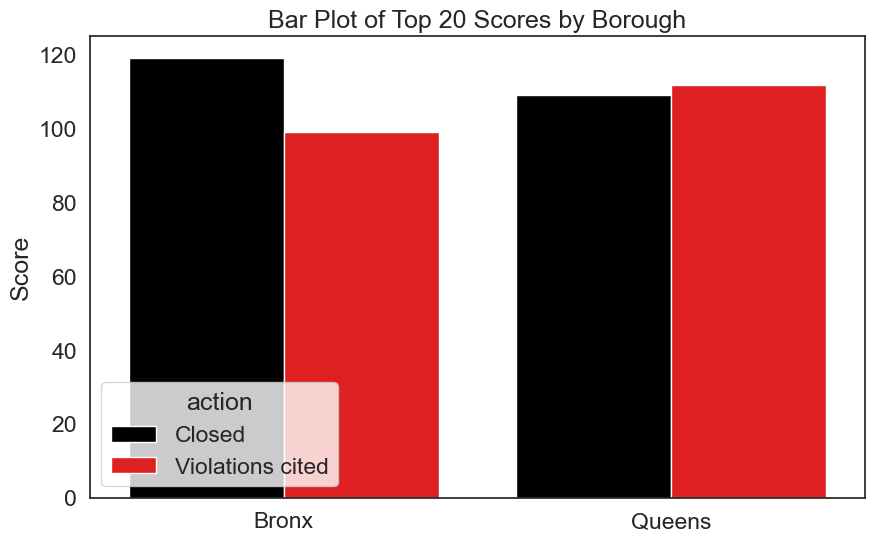



t-statistic: -1.938618517976592

Failed to reject the null hypothesis with a P-value of 0.06000178954876174

There is no significant difference in health inspection scores between the Bronx and Queens.


In [10]:
e.visual_3(ny)

  ## Takeaway: 
    
- **At first look across five borough there seems to be a difference between the Bronx and Queens, after only comparing both boroughs we can determine there is no significant difference in health inspection scores between the Bronx and Queens**

# Q-4. Is there a correlation between health inspection scores and health inspection dates over time?

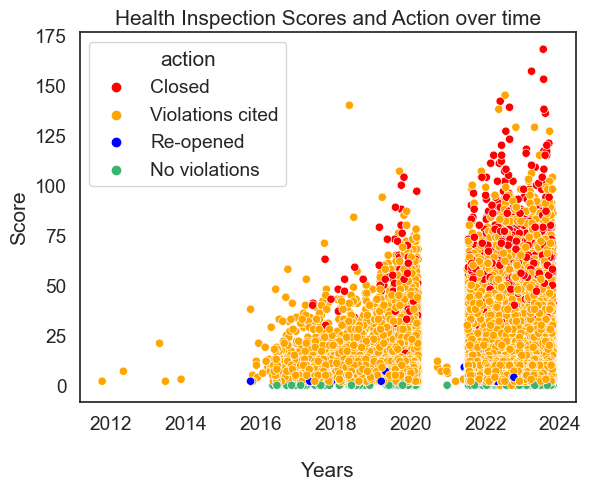



Pearson Correlation Coefficient: 0.104665766145112

Rejected the null hypothesis with a P-value of 1.007973892878982e-147.

There is a statistically significant correlation between inspection scores and inspection dates.


In [11]:
e.visual_4(ny)

  ## Takeaway: 
    
- **There appears to be a statistical correlation between scores and inspection dates over time. We can also see how there are more closed businesses after inspection in recent time and only a handful of business seem to be re-opened after a failed inspection. These features show there may be promising results when trying to predict scores, but covid pandemic gap may lead it to not be an impactful feature for modeling.**
<br>
  
- ***Note:*** ***There is gap from 2020 to 2021 which is due to the COVID-19 Pandemic.***

## NYC Health Inspection Explore Summary:
- **Dunkin Donuts are among the highest counted businesses with health inspections.**  
- **In cuisine-description for New York is mostly composed of "American". There are descriptions without a clear ethnic association which may make this feature weak.**  
- **There is no significant difference between the top 20 businesses with high (failing scores) that were associated with a closed or violation cited action**  
- **There is a statistical correlation between health inspection scores and dates.**

# Modeling

In [12]:
import acquire as a
import prepare as p
import model as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ny_reviews = p.acquire_ny_reviews()

ny_reviews.csv found!


In [14]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   camis                  2594 non-null   int64  
 1   dba                    2594 non-null   object 
 2   boro                   2594 non-null   object 
 3   phone                  2594 non-null   int64  
 4   inspection_date        2594 non-null   object 
 5   latitude               2594 non-null   float64
 6   longitude              2594 non-null   float64
 7   cuisine_description    2594 non-null   object 
 8   action                 2594 non-null   object 
 9   score                  2594 non-null   int64  
 10  grade                  2594 non-null   object 
 11  full_address           2594 non-null   object 
 12  violation_code         2594 non-null   object 
 13  violation_description  2594 non-null   object 
 14  last_inspection_date   2594 non-null   object 
 15  avg_

In [15]:
ny_reviews.columns.to_list()

['camis',
 'dba',
 'boro',
 'phone',
 'inspection_date',
 'latitude',
 'longitude',
 'cuisine_description',
 'action',
 'score',
 'grade',
 'full_address',
 'violation_code',
 'violation_description',
 'last_inspection_date',
 'avg_service',
 'avg_atmosphere',
 'avg_food',
 'avg_price',
 'reviews_sw',
 'reviews',
 'neg',
 'neu',
 'pos',
 'compound']

In [16]:
ny_reviews.grade.value_counts()

grade
A    1430
B     665
C     499
Name: count, dtype: int64

In [17]:
grademap = {'A': 'Pass', 'B': 'Pass', 'C': 'Fail'}

ny_reviews = ny_reviews.rename(columns={'neg' : 'negative',
                                        'neu' : 'neutral',
                                        'pos' : 'positive',})

ny_reviews['grade'] = ny_reviews['grade'].map(grademap)

In [18]:
ny_reviews = ny_reviews[['grade', 'avg_service', 'avg_atmosphere', 'avg_food', 'avg_price', 'reviews', 'negative', 'neutral', 'positive', 'compound']]

In [19]:
ny_reviews.head()

,grade,avg_service,avg_atmosphere,avg_food,avg_price,reviews,negative,neutral,positive,compound
0,Pass,5.000000,5.000000,5.0,60.612245,horrible food slow service seafood paella tast...,0.084,0.673,0.244,0.9975
1,Pass,5.000000,5.000000,5.0,60.612245,superb havent good paella since moving back ny...,0.041,0.630,0.330,0.9998
2,Pass,5.000000,5.000000,5.0,60.612245,gem ocano nyc spanish dish old school spanish ...,0.055,0.581,0.365,1.0000
3,Fail,4.333333,4.333333,4.5,17.692308,authentic place point needed lot help managed ...,0.060,0.688,0.252,0.7717
4,Pass,4.333333,4.333333,4.5,17.692308,really great classic chinese comfort food grea...,0.000,0.537,0.463,0.9468


In [20]:
ny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594 entries, 0 to 2593
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grade           2594 non-null   object 
 1   avg_service     2594 non-null   float64
 2   avg_atmosphere  2594 non-null   float64
 3   avg_food        2594 non-null   float64
 4   avg_price       2594 non-null   float64
 5   reviews         2594 non-null   object 
 6   negative        2594 non-null   float64
 7   neutral         2594 non-null   float64
 8   positive        2594 non-null   float64
 9   compound        2594 non-null   float64
dtypes: float64(8), object(2)
memory usage: 202.8+ KB


In [21]:
ny_reviews.columns.to_list()

['grade',
 'avg_service',
 'avg_atmosphere',
 'avg_food',
 'avg_price',
 'reviews',
 'negative',
 'neutral',
 'positive',
 'compound']

# Predicting Fail
-------

# Baseline Model 

In [22]:
import model as m
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [23]:
m.baseline()


Baseline Model

Train Accuracy: 55.43%


Validation Accuracy: 57.07%



# Logistic Regression Model

In [24]:
m.model_1()


Logistic Regression Model

Train Accuracy: 0.82


Validation Accuracy: 0.54


Classification Report for Training Set:

              precision    recall  f1-score   support

        Fail       0.87      0.72      0.78       809
        Pass       0.80      0.91      0.85      1006

    accuracy                           0.82      1815
   macro avg       0.83      0.81      0.82      1815
weighted avg       0.83      0.82      0.82      1815





Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.46      0.40      0.43       167
        Pass       0.59      0.65      0.62       222

    accuracy                           0.54       389
   macro avg       0.53      0.52      0.52       389
weighted avg       0.54      0.54      0.54       389




# XGBClassifier (Hyperparameters)

In [25]:
m.model_3()


XGBClassifier Model (Hyperparameters Used)

Train Accuracy: 0.91


Validation Accuracy: 0.81


Classification Report for Training Set:

              precision    recall  f1-score   support

        Fail       1.00      0.56      0.71       360
        Pass       0.90      1.00      0.95      1455

    accuracy                           0.91      1815
   macro avg       0.95      0.78      0.83      1815
weighted avg       0.92      0.91      0.90      1815



Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.08      0.02      0.03        62
        Pass       0.84      0.97      0.90       327

    accuracy                           0.81       389
   macro avg       0.46      0.49      0.46       389
weighted avg       0.72      0.81      0.76       389




# Logistic Regression (Hyperparameters)

In [26]:
m.model_4()


Logisitic Regression Model (Hyperparameters Used)

Train Accuracy: 0.83


Validation Accuracy: 0.52


Classification Report for Training Set:

              precision    recall  f1-score   support

        Fail       0.78      0.86      0.82       809
        Pass       0.88      0.81      0.84      1006

    accuracy                           0.83      1815
   macro avg       0.83      0.83      0.83      1815
weighted avg       0.83      0.83      0.83      1815





Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.45      0.55      0.50       167
        Pass       0.60      0.50      0.54       222

    accuracy                           0.52       389
   macro avg       0.52      0.53      0.52       389
weighted avg       0.54      0.52      0.52       389




# Random Forest

In [27]:
import model as m
m.model_5()


Random Forest Model (Hyperparameters Used)

Train Accuracy: 1.00


Validation Accuracy: 0.54


Classification Report for Random Forest (Training Set):

              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00       809
        Pass       1.00      1.00      1.00      1006

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815





Classification Report for Random Forest (Validation Set):

              precision    recall  f1-score   support

        Fail       0.46      0.34      0.39       167
        Pass       0.58      0.70      0.64       222

    accuracy                           0.54       389
   macro avg       0.52      0.52      0.51       389
weighted avg       0.53      0.54      0.53       389




# Final Model


XGBClassifier Model (Hyperparameters Used)

Train Accuracy: 0.91


Validation Accuracy: 0.81


Test Accuracy: 0.78


Classification Report for Training Set:

              precision    recall  f1-score   support

        Fail       1.00      0.56      0.71       360
        Pass       0.90      1.00      0.95      1455

    accuracy                           0.91      1815
   macro avg       0.95      0.78      0.83      1815
weighted avg       0.92      0.91      0.90      1815



Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.08      0.02      0.03        62
        Pass       0.84      0.97      0.90       327

    accuracy                           0.81       389
   macro avg       0.46      0.49      0.46       389
weighted avg       0.72      0.81      0.76       389



Classification Report for Validation Set:

              precision    recall  f1-score   support

        Fail       0.17      0.03      0.0

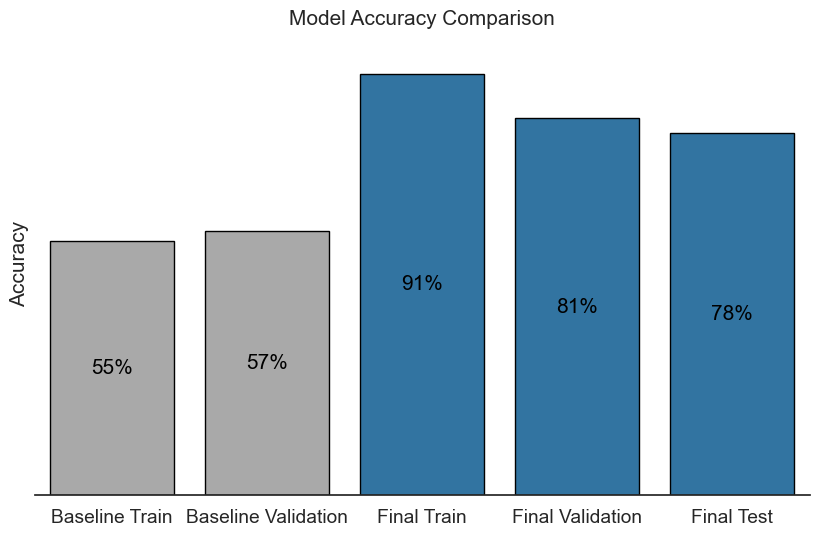

In [28]:
import model as m
m.final_model()